In [103]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf 
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [13]:
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")
msft = pd.DataFrame(msft_hist)

In [15]:
nio = yf.Ticker('NIO')
nio_hist = nio.history(period="max")
nio = pd.DataFrame(nio_hist)

In [17]:
x = msft.index
y = msft['Close']

## EDA

In [35]:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

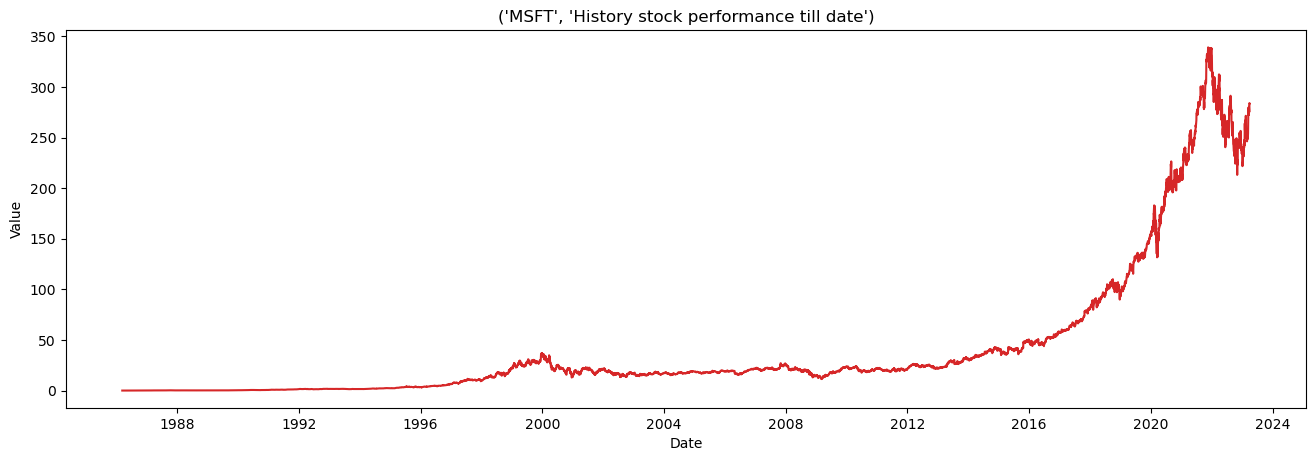

In [36]:
stock_name= "MSFT"
title = (stock_name,"History stock performance till date")
df_plot(msft , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [21]:
print(msft.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [22]:
msft = msft.dropna()

In [25]:
msft.drop_duplicates(keep=False, inplace=True)

In [26]:
q1 = msft['Close'].quantile(0.25)
q3 = msft['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = msft[msft['Close'] <= upper_bound]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
msft[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(msft[['Open', 'High', 'Low', 'Close', 'Volume']])

In [46]:
msft = pd.read_csv('msft.csv')

In [48]:
#print(msft.isnull().sum())

In [49]:
msft['Date'] = pd.to_datetime(msft['Date'])

In [50]:
print(msft.duplicated().sum())

0


In [56]:
msft.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [53]:
q1 = msft['Close'].quantile(0.25)
q3 = msft['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = msft[msft['Close'] <= upper_bound]

In [58]:
scaler = StandardScaler()
msft[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(msft[['Open', 'High', 'Low', 'Close', 'Volume']])

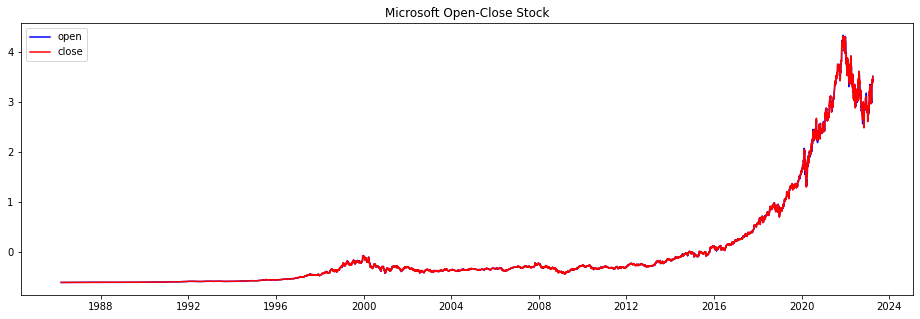

In [70]:
plt.plot(msft['Date'],
         msft['Open'],
         color="blue",
         label="open")
plt.plot(msft['Date'],
         msft['Close'],
         color="red",
         label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

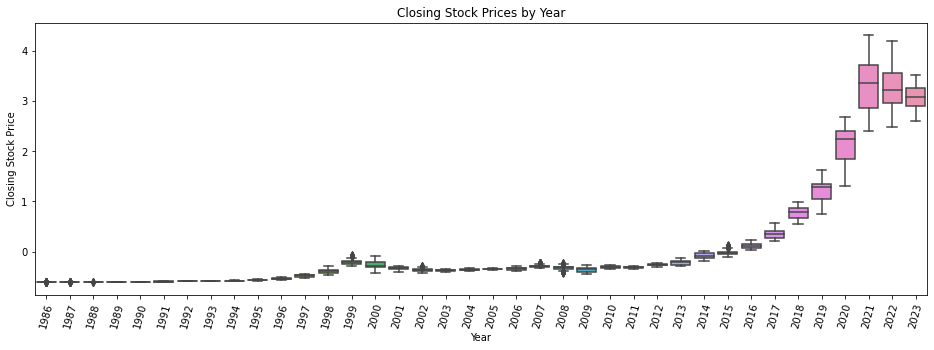

In [74]:
msft['year'] = msft['Date'].dt.year
sns.boxplot(x='year', y='Close', data=msft)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=75)
plt.show()

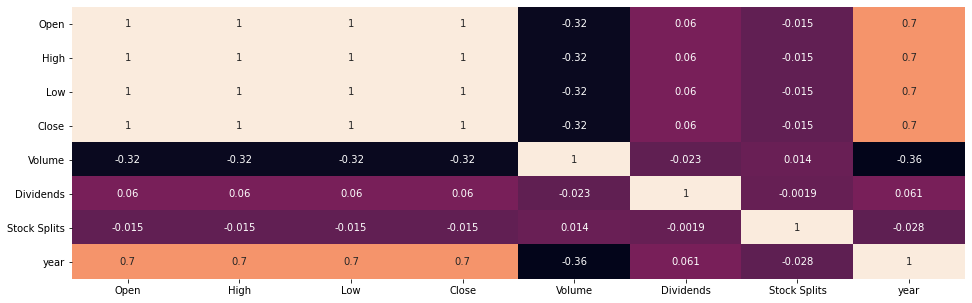

In [78]:
sns.heatmap(msft.corr(),
            annot=True,
            cbar=False)
plt.show()

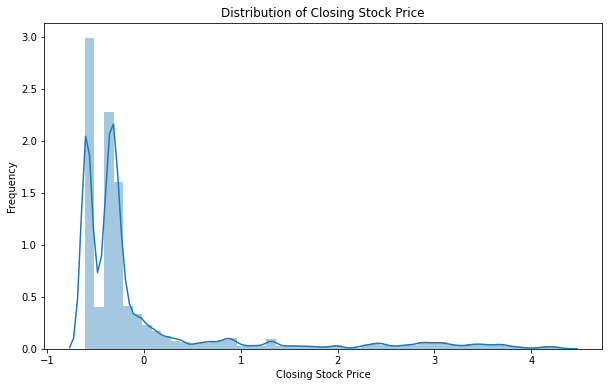

In [80]:
plt.figure(figsize=(10, 6))
sns.distplot(msft['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

In [84]:
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")
msft = pd.DataFrame(msft_hist)

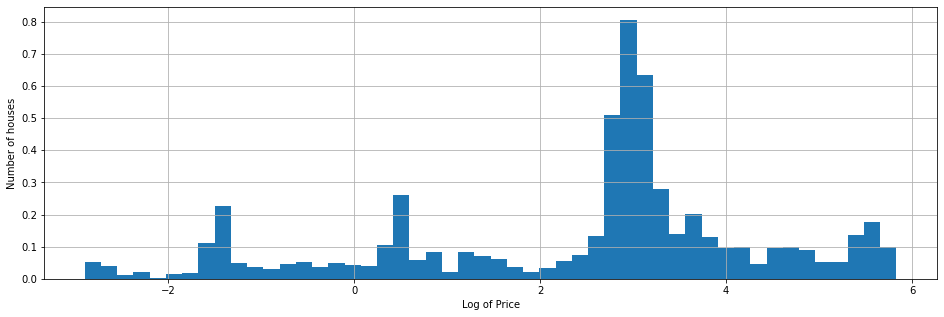

In [87]:
np.log(msft['Open']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Price')
plt.show()

## LSTM model

In [88]:
x = msft.index
y = msft['Close']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [90]:
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(7938,)
(1401,)
(7938,)
(1401,)


In [97]:
close_prices = msft['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [98]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [93]:
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [99]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
7412/7412 [==============================] - 175s 23ms/step - loss: 2.5206e-05
Epoch 2/3
7412/7412 [==============================] - 167s 23ms/step - loss: 8.3599e-06
Epoch 3/3
7412/7412 [==============================] - 166s 22ms/step - loss: 5.8475e-06


In [101]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

59/59 [==============================] - 2s 20ms/step


12.173549529506232

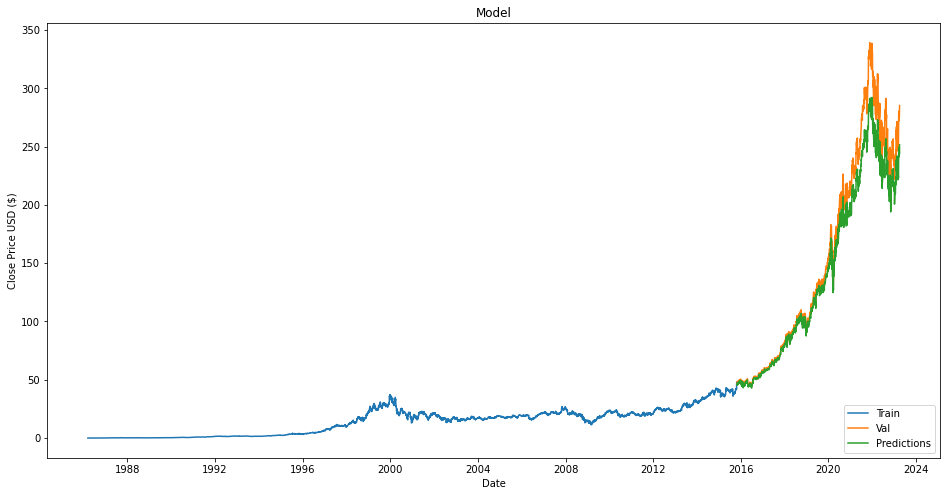

In [104]:
data = msft.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## RNN


In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [107]:
regressor = Sequential()

In [109]:
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (x_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )

In [110]:
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [111]:
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [112]:
regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

In [113]:
regressor.add(Dense(units = 1))

regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history = regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
232/232 [==============================] - 11s 33ms/step - loss: 0.0691 - accuracy: 0.0000e+00
Epoch 2/50
232/232 [==============================] - 7s 32ms/step - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 3/50
232/232 [==============================] - 8s 36ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 4/50
232/232 [==============================] - 9s 39ms/step - loss: 9.6253e-04 - accuracy: 0.0000e+00
Epoch 5/50
232/232 [==============================] - 9s 39ms/step - loss: 7.2038e-04 - accuracy: 0.0000e+00
Epoch 6/50
232/232 [==============================] - 9s 39ms/step - loss: 5.6796e-04 - accuracy: 0.0000e+00
Epoch 7/50
232/232 [==============================] - 9s 39ms/step - loss: 4.4559e-04 - accuracy: 0.0000e+00
Epoch 8/50
232/232 [==============================] - 9s 39ms/step - loss: 3.4072e-04 - accuracy: 0.0000e+00
Epoch 9/50
232/232 [==============================] - 9s 40ms/step - loss: 3.0753e-04 - accuracy: 0.0000e+00
Epoch 10/50
232/232 [=========

In [114]:
history.history["loss"]

[0.06907320022583008,
 0.003938986454159021,
 0.001725649693980813,
 0.0009625291568227112,
 0.0007203849381767213,
 0.0005679606110788882,
 0.00044559198431670666,
 0.0003407159820199013,
 0.0003075326676480472,
 0.0002685174986254424,
 0.00023282079200726002,
 0.00020568161562550813,
 0.00019190384773537517,
 0.00016591597523074597,
 0.0001547661959193647,
 0.00013769982615485787,
 0.0001313362445216626,
 0.00011283722415100783,
 0.0001064622774720192,
 0.00010042151552625,
 9.681029041530564e-05,
 8.092001371551305e-05,
 7.972185267135501e-05,
 7.480399654014036e-05,
 6.960507744224742e-05,
 6.96929419063963e-05,
 6.471901724580675e-05,
 5.5897198762977496e-05,
 5.857154610566795e-05,
 5.077336754766293e-05,
 4.673341027228162e-05,
 4.1952618630602956e-05,
 4.9722326366463676e-05,
 4.391074980958365e-05,
 4.006339077022858e-05,
 3.7627680285368115e-05,
 4.06289218517486e-05,
 3.447944254730828e-05,
 3.406491669011302e-05,
 2.9640814318554476e-05,
 2.944222251244355e-05,
 2.780272370

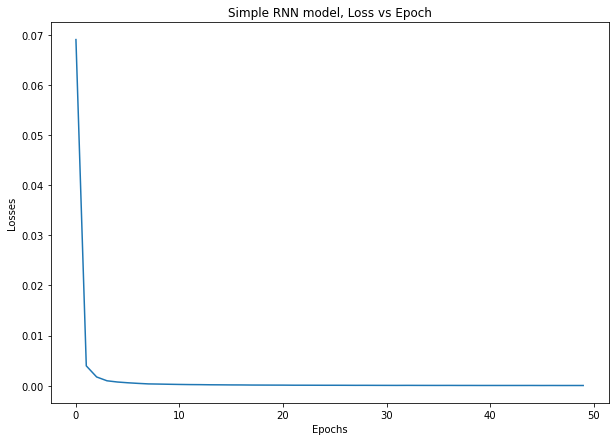

In [115]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

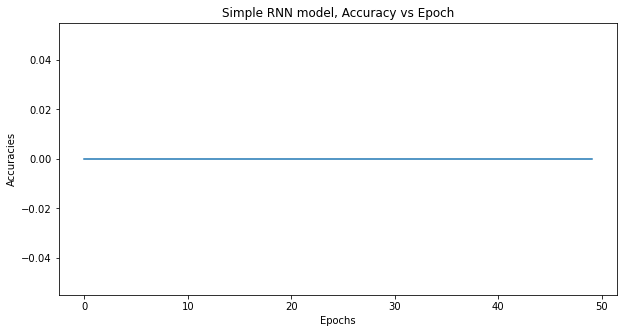

In [116]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [117]:
y_pred = regressor.predict(x_train) 
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

232/232 [==============================] - 3s 10ms/step


(7412, 1)

In [ ]:
y_train = preprocessing.normalize([y_train])

In [148]:
plt.figure(figsize = (20, 5))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

ValueError: Image size of 1164x117951 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x360 with 1 Axes>